# Degrees model

Here we develop a model to convert celsius degrees in fahrenheit degrees. The objetive behind this dummy model is to see how to implement different layers to our model and how effective those layers are. 
This results are useful to develop intuition and dig in how a neural network works and how machine learning is implemented.

In [36]:
# We import principal packages.
import tensorflow as tf
import numpy as np

In [37]:
# We define the dataset we will use in the problem, in this case are two vectors
# with inputs (celsius) and outputs (fahrenheit).
celsius = np.array([-40,-10,0,8,15,22,38], dtype = float)
fahrenheit = np.array([-40,14,32,46,59,72,100],dtype = float)

In [51]:
# Remember that 'Dense' layers are those in which all neurons are interconnected.
# In this case as we have only two neurons is a Dense layer.
# We use Keras to indicate that output layer has a neuron throught 'units' command, 
# and we indicate that input layer has a neuron throught 'input_shape' command.
capa = tf.keras.layers.Dense(units=1,input_shape=[1])

# We use 'Sequential' model due to the simplicity of our problem.
modelo = tf.keras.Sequential([capa])

In [53]:
# We prepare model to execute.
# We use Adam to adjust efficiently weights and bias, we indicate 0.1 as readjust rate
# and MSE as loss function
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1), 
    loss = 'mean_squared_error'
)

In [54]:
# We train the model
print("Starting training...")
historial = modelo.fit(celsius,fahrenheit, epochs=1000, verbose = False)
print("Model trained!")

Starting training...
Model trained!


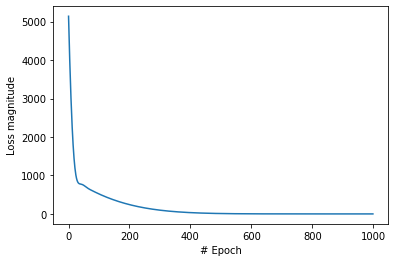

In [60]:
# Let's see the training results
import matplotlib.pyplot as plt
plt.xlabel("# Epoch")
plt.ylabel("Loss magnitude")
plt.plot(historial.history["loss"])

# We can see how with ~500 epochs could be enought

In [61]:
# Let's make a prediction
import random 
temp_pred = random.randint(-40, 300)
resultado = modelo.predict([temp_pred])
print(str(temp_pred), 'celsius throught our model is',str(resultado),"fahrenheit")

1/1 [==============================] - 0s 81ms/step
246 celsius throught our model is [[474.2917]] fahrenheit


In [62]:
# Let's see how model assigned weights and bias 
print('Inner variables of model')
print(capa.get_weights())

Inner variables of model
[array([[1.7982856]], dtype=float32), array([31.913418], dtype=float32)]


In [64]:
# Now we add hidden layers to see how our model improve (or not).

oculta1 = tf.keras.layers.Dense(units = 3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units = 3)
salida = tf.keras.layers.Dense(units = 1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [65]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1), 
    loss = 'mean_squared_error'
)

print("Starting training...")
historial = modelo.fit(celsius,fahrenheit, epochs=1000, verbose = False)
print("Model trained!")

# Apreciate how the training time is higher

Starting training...
Model trained!


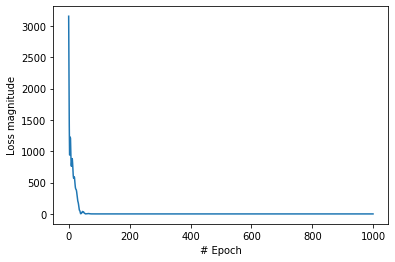

In [67]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoch")
plt.ylabel("Loss magnitude")
plt.plot(historial.history["loss"])

# Here with only ~50 epochs we can see as it could be enought

In [68]:
import random 
temp_pred = random.randint(-40, 300)
resultado = modelo.predict([temp_pred])
print(str(temp_pred), 'celsius throught our model is',str(resultado),"fahrenheit")

1/1 [==============================] - 0s 159ms/step
162 celsius throught our model is [[323.22028]] fahrenheit
